In [1]:
import numpy as np
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

def read_timings():
    tdict = {}
    tsumdict = {}
    with open("timings.dat", "r") as f:
        lines = f.readlines()
        names = []
        vals = []
        for line in  lines:
            toks = line.split()
            tdict[toks[0]] = float(toks[1])
            tsumdict[toks[0]] = float(toks[2])
    return tdict,tsumdict


In [2]:
df_per_result = pd.DataFrame()
df_total_time = pd.DataFrame()
xval = [1024 ,2048,4096,8192,16384,32768,65536] 

for v in xval:
    subprocess.call("python generate_coords.py {}".format(v), shell=True)
    subprocess.call("./build/timings data.txt 100000", shell=True)
    tdict_v, tsumdict_v = read_timings()
    df_per_result = df_per_result.append(tdict_v,ignore_index=True)
    df_total_time = df_total_time.append(tsumdict_v,ignore_index=True)
    subprocess.call("rm timings.dat", shell=True)

In [3]:
index = {}
names = list(tdict_v.keys())
for i in range(len(xval)):
    index[i] = xval[i]

df_per_result = df_per_result.rename(index=index)
print(df_per_result)
df_total_time = df_total_time.rename(index=index)
print(df_per_result)


                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.287470e-09  1.027490e-08  8.396990e-09  1.298240e-09  1.051600e-08   
2048   1.554770e-09  1.287320e-08  1.068880e-08  1.572460e-09  1.326290e-08   
4096   1.956420e-09  1.538410e-08  1.240090e-08  1.948600e-09  1.516690e-08   
8192   2.043050e-09  1.766190e-08  1.427200e-08  2.337650e-09  1.700130e-08   
16384  1.360300e-09  1.088430e-08  9.245650e-09  1.384640e-09  1.125900e-08   
32768  1.315840e-09  1.010670e-08  8.580280e-09  1.308520e-09  1.044870e-08   
65536  1.441660e-09  1.106580e-08  9.324570e-09  1.450640e-09  1.137110e-08   

                XMM  
1024   1.957620e-09  
2048   2.286910e-09  
4096   2.666350e-09  
8192   2.917200e-09  
16384  1.966430e-09  
32768  1.901930e-09  
65536  2.069620e-09  
                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.287470e-09  1.027490e-08  8.396990e-09  1.298240e-09  1.051600e-08   
2048   1.554770e-09  1.287320e-08

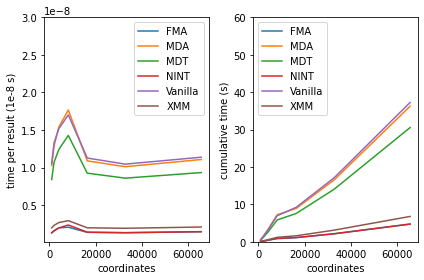

In [4]:
fig, axes = plt.subplots(ncols=2)
df_per_result.plot(ax=axes[0])
df_total_time.plot(ax=axes[1])
axes[0].set_xlabel("coordinates")
axes[0].set_ylabel("time per result (1e-8 s)")
axes[0].set_ylim(0.01*1e-8, 3*1e-8)
axes[1].set_xlabel("coordinates")
axes[1].set_ylabel("cumulative time (s)")
axes[1].set_ylim(0, 60)
fig.tight_layout()

In [5]:
fig.savefig("PLOT_mavx2_O3_ffast_math_fno_matherrno_mfma.png")